# Customer segmentation

## 1. Understanding the Problem

## 2. Data Understanding

### 2.1. Data collection

Structure of the data:

* **Features**:
  * **ID**: Unique ID
  * **Gender**: Gender
  * **Ever_Married**: Marital status of the customer
  * **Age**: Age
  * **Graduated**: Is the customer a graduate?
  * **Profession**: Profession of the customer
  * **Work_Experience**: Work Experience in years
  * **Spending_Score**: Spending Score
  * **Family_Size**: Family Size
  * **Var_1**: Category for the customer
* Target variable:
  * **Segmentation**: Customer Segment of the customer

Link: <https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation>

### 2.2. Analytical approach

## 3. Data exploration

### 3.1. Review the state of the data

This is a first glance over the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json
import os

In [2]:
plt.style.use('ggplot')

In [3]:
with open("configuration.json", "r") as f:
    data_configuration = json.load(f)

PATH_DATA = data_configuration["path_data"]

In [6]:
# Mount data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train = pd.read_csv(os.path.join(PATH_DATA, "train.csv"))
print("Shape:", df_train.shape)
df_train.head()

Shape: (8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

#### 3.1.1. Categorical

In [7]:
categorical_features = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]

In [8]:
for c in categorical_features:
    print("\nFeature:", c)
    print(df_train[c].unique())


Feature: Gender
['Male' 'Female']

Feature: Ever_Married
['No' 'Yes' nan]

Feature: Graduated
['No' 'Yes' nan]

Feature: Profession
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Feature: Spending_Score
['Low' 'Average' 'High']

Feature: Var_1
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


#### 3.1.2. Numeric

In [9]:
numeric_features = ["Age", "Family_Size"]
df_train[numeric_features].describe()

,Age,Family_Size
count,8068.000000,7733.000000
mean,43.466906,2.850123
std,16.711696,1.531413
min,18.000000,1.000000
25%,30.000000,2.000000
50%,40.000000,3.000000
75%,53.000000,4.000000
max,89.000000,9.000000


#### 3.1.3. Target variable

In [10]:
target_variable = "Segmentation"
df_train[target_variable].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

#### 3.1.4. Conclusion

### 3.2. Data cleaning

Based on initial conclusions, it is necessary to apply data cleaning.

Replace missing values with most frequent classes.

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
si = SimpleImputer(strategy = "most_frequent")
ar = si.fit_transform(df_train)
df_train = pd.DataFrame(ar, columns = df_train.columns)

print("Shape:", df_train.shape)
df_train.head()

Shape: (8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [13]:
print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### 4.3. Exploratory Data Analysis (EDA)

Explore the data distribucion.

#### 4.3.1. Categorical

In [15]:
from scipy.stats import chi2_contingency

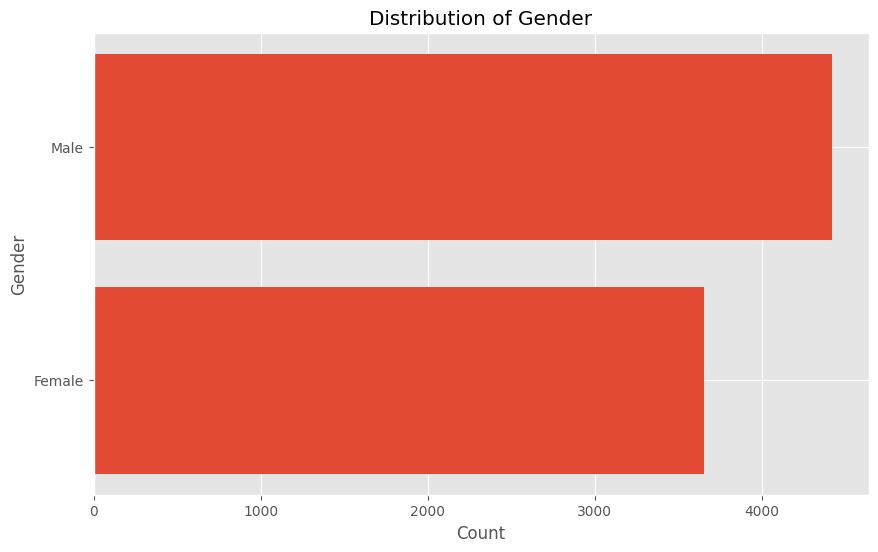

In [16]:
gender_count = df_train["Gender"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(gender_count.index, gender_count.values)
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender")
plt.gca().invert_yaxis()
plt.show()

In [17]:
contingency_table = pd.crosstab(df_train["Gender"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Gender and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Gender and {target_variable}.")

Reject the null hypothesis: There is a significant association between Gender and Segmentation.


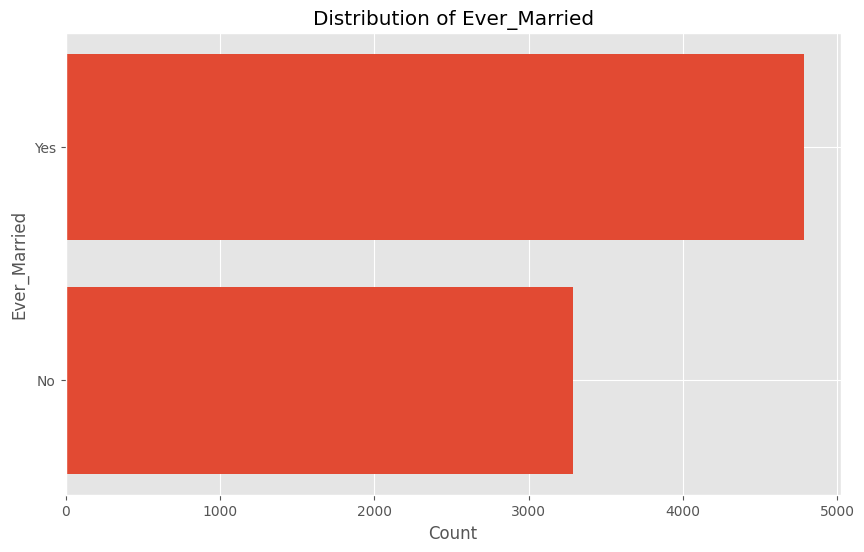

In [18]:
ever_married_count = df_train["Ever_Married"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(ever_married_count.index, ever_married_count.values)
plt.xlabel("Count")
plt.ylabel("Ever_Married")
plt.title("Distribution of Ever_Married")
plt.gca().invert_yaxis()
plt.show()

In [19]:
contingency_table = pd.crosstab(df_train["Ever_Married"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Ever_Married and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Ever_Married and {target_variable}.")

Reject the null hypothesis: There is a significant association between Ever_Married and Segmentation.


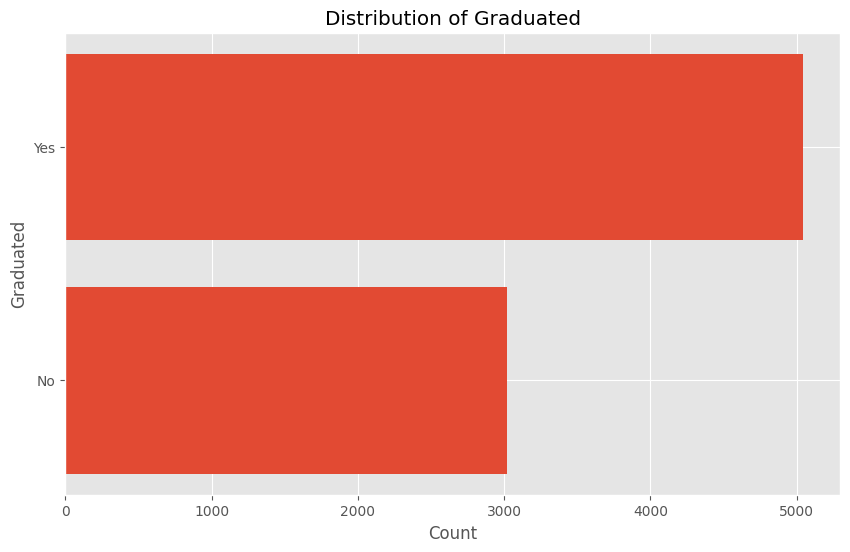

In [20]:
graduated_count = df_train["Graduated"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(graduated_count.index, graduated_count.values)
plt.xlabel("Count")
plt.ylabel("Graduated")
plt.title("Distribution of Graduated")
plt.gca().invert_yaxis()
plt.show()

In [21]:
contingency_table = pd.crosstab(df_train["Graduated"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Graduated and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Graduated and {target_variable}.")

Reject the null hypothesis: There is a significant association between Graduated and Segmentation.


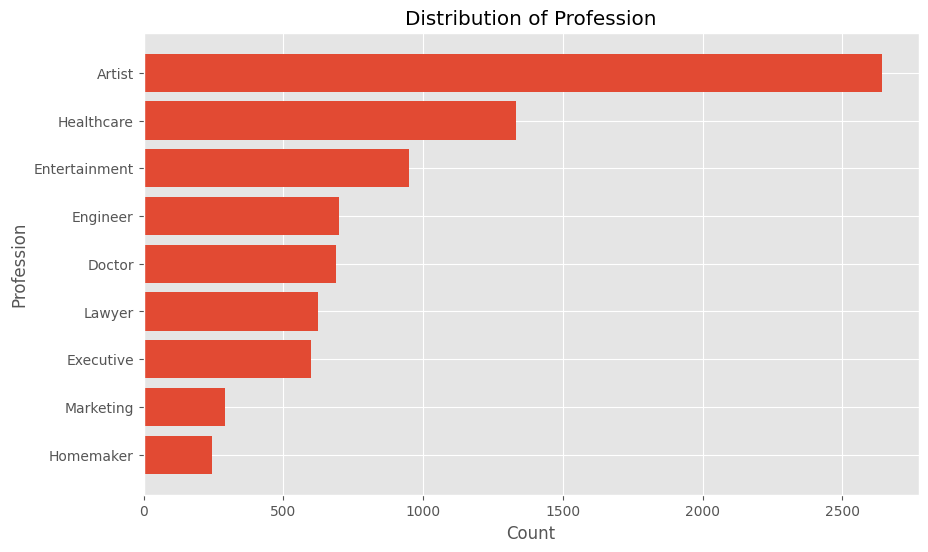

In [22]:
profession_count = df_train["Profession"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(profession_count.index, profession_count.values)
plt.xlabel("Count")
plt.ylabel("Profession")
plt.title("Distribution of Profession")
plt.gca().invert_yaxis()
plt.show()

In [23]:
contingency_table = pd.crosstab(df_train["Profession"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Profession and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Profession and {target_variable}.")

Reject the null hypothesis: There is a significant association between Profession and Segmentation.


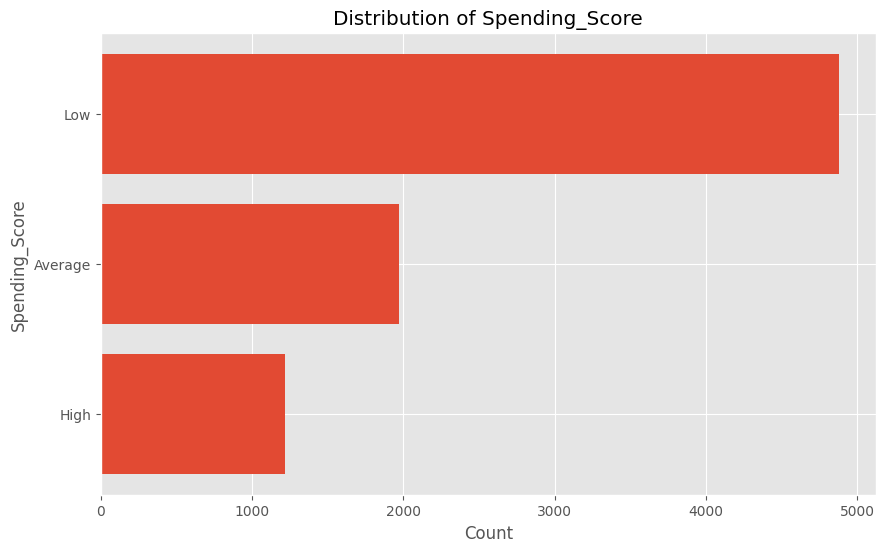

In [24]:
spending_score_count = df_train["Spending_Score"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(spending_score_count.index, spending_score_count.values)
plt.xlabel("Count")
plt.ylabel("Spending_Score")
plt.title("Distribution of Spending_Score")
plt.gca().invert_yaxis()
plt.show()

In [25]:
contingency_table = pd.crosstab(df_train["Spending_Score"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Spending_Score and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Spending_Score and {target_variable}.")

Reject the null hypothesis: There is a significant association between Spending_Score and Segmentation.


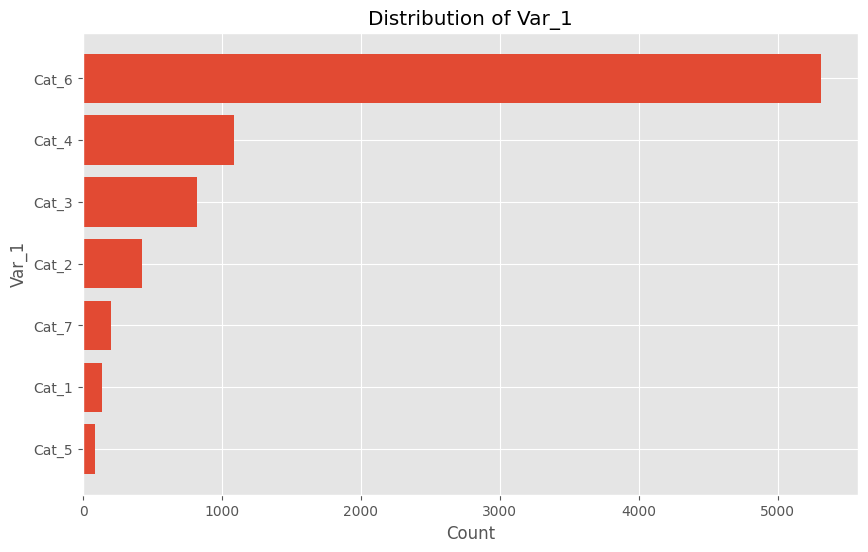

In [26]:
var_1_count = df_train["Var_1"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(var_1_count.index, var_1_count.values)
plt.xlabel("Count")
plt.ylabel("Var_1")
plt.title("Distribution of Var_1")
plt.gca().invert_yaxis()
plt.show()

In [27]:
contingency_table = pd.crosstab(df_train["Var_1"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Var_1 and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Var_1 and {target_variable}.")

Reject the null hypothesis: There is a significant association between Var_1 and Segmentation.


#### 4.3.2. Numerical

Explore data correlation.

In [28]:
df_train[numeric_features].describe()

,Age,Family_Size
count,8068,8068.0
unique,67,9.0
top,35,2.0
freq,250,2725.0


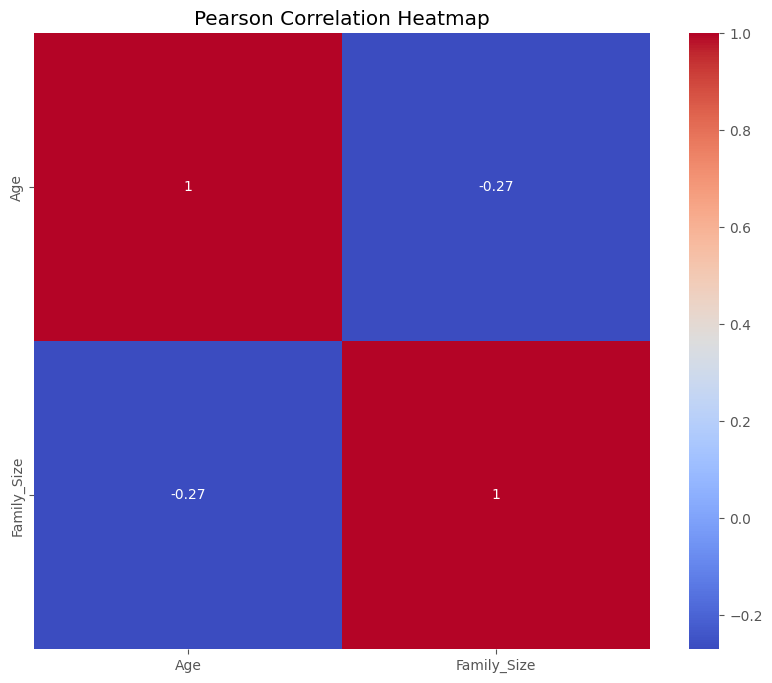

In [29]:
correlation_matrix = df_train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

#### 4.3.3. Target variable

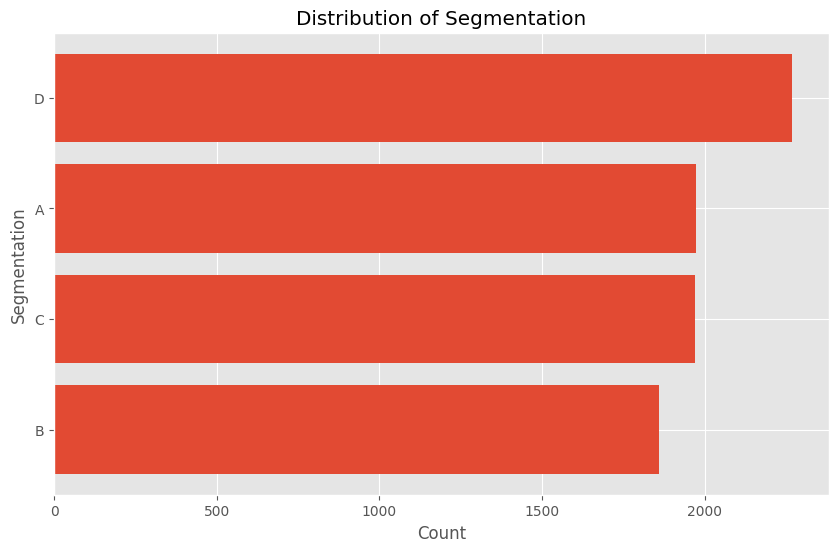

In [30]:
segmentation_count = df_train[target_variable].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(segmentation_count.index, segmentation_count.values)
plt.xlabel("Count")
plt.ylabel("Segmentation")
plt.title("Distribution of Segmentation")
plt.gca().invert_yaxis()
plt.show()

#### 4.3.4. Conclusion

#### 4.3.5. Save file

In [31]:
path_csv_clean = "train_cleaned.csv"
df_train.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)